# Objectives

* Describe when clustering is the appropriate analysis technique
* Use scikit-learn to perform k-means clustering

***

# 1. Clustering
[K-Means clustering](https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/) is an unsupervised analytical technique used on unlabeled data to partition the data into K groups. 

**Q1.1** [Try it out here!](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) I recommend selecting 'Randomly' and then 'Packed Circles' and adding 7 centroids (visually I see 7 distinct clusters). Click 'GO!' and then continuously click 'Update Centroids' -> 'Reassign Points' until the k-means algorithm reaches a state where the centroids are not moved any more (convergence). Did the k-means algorithm identify the same 7 groups that you visually saw?

## K-Means Clustering Psuedocode
1. Choose the number of clusters (*K*) and obtain the data points 


2. Place the centroids *c<sub>1</sub>*, *c<sub>2</sub>*, ..... *c<sub>k</sub>* randomly 


3. Repeat steps 4 and 5 until convergence or until the end of a fixed number of iterations


4. for each data point *x<sub>i</sub>*:
    - find the nearest centroid (*c<sub>1</sub>*, *c<sub>2</sub>* .. *c<sub>k</sub>*) 
    - assign the point to that cluster 


5. for each cluster *j* = 1...*k*
    - new centroid = mean of all points assigned to that cluster 

![kmeans gif](https://miro.medium.com/max/480/0*f9HcysjkU6XyM1hb.gif)

This exercise will walk through k-means clustering to categorize countries by Latitude, Longitude and Language.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

Read the data from `country_clusters.csv` and save it to the variable `data`. This is a small dataset, so inspect the DataFrame by simply typing the variable name, `data`.

In [2]:
# read country clusters data
data = pd.read_csv('country_clusters.csv')

# inspect data
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data
One of the easiest ways to visualize data is a scatter plot. This is really only useful when we have 2-3 features. Once we have more features, the data becomes impossible to visualize. We can use human intuition to decide which features are most important. For this dataset, it makes sense to try to reach a result resembling the world map, so we must use the longitude as x, and the latitude as y.

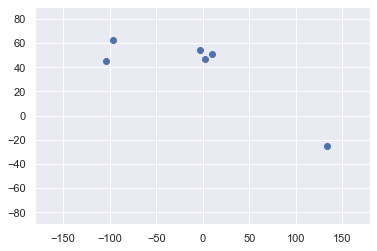

In [4]:
# Use the simplest code possible to create a scatter plot using the longitude and latitude
plt.scatter(data['Longitude'],data['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Map the data

Unfortunately, we cannot use categorical the way it currently is (Language: English, German, French), so we must map the languages to 0, 1, and 2. 

In [6]:
# Create a copy of the original dataset
data_mapped = data.copy()

# Map languages with 0, 1, and 2
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})

# Check if we did it correctly
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features

In [7]:
# slice the data to select the features Lat, Long and Language
x = data_mapped.iloc[:,1:4]

In [8]:
# Check if we worked correctly
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering
We will be creating an instance of an abstract class called `KMeans`. This class has methods for us to use to fit our data to make a model and make predictions from our data. 

**NOTE: Our dataset is extremely small, so we will not be splitting our data into training and evaluation sets**

In [19]:
# Create a KMeans object (which we will assign to kmeans)
# The number in the parantheses is K, or the number of clusters we are aiming for
kmeans = KMeans(3)

In [20]:
# Fit the input data (cluster the data in our features (X) into K clusters)
kmeans.fit(x)

KMeans(n_clusters=3)

## Clustering results

In [21]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [22]:
# Create a copy of the mapped data
data_with_clusters = data_mapped.copy()

# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters

# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


Plot the data using the longitude and latitude similar to what we did above. This time, use the parameter `c` to color the points based on their cluster. Additionally, I like to use the [`cmap` parameter](https://matplotlib.org/users/colormaps.html)  (provide the argument 'rainbow') to change the default colors. 

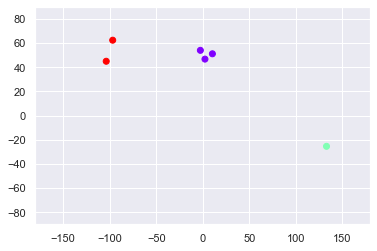

In [23]:
# scatter plot
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')

# change x and y axis
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

***

# 2. Selecting the Best Number of Clusters

## WCSS (within-cluster sum of squares)
WCSS gives a very good idea about the different distances between different clusters and within clusters, thus providing us a rule for deciding the appropriate number of clusters. **Remember: for k-means clustering we want to have a minimal distance between our data and the k centroids, while balancing the interpretability of the k groups**

In [14]:
# Get the WCSS for the current solution (k = 2)
kmeans.inertia_

13208.958119999996

In [15]:
# Create an empty list
wcss = []

# Create all possible cluster solutions for k = 1 to 7 and save inertia to a list
for k in range(1,7):
    # Cluster solution with i clusters
    kmeans = KMeans(k)
    
    # Fit the data
    kmeans.fit(x)
    
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    
    # Append the value to the WCSS list
    wcss.append(wcss_iter)

In [17]:
# Let's see what we got
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

## The Elbow Method
[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.) helps us visually inspect the 'goodness' (WCSS) of our k-means model. We want to choose k where there is an 'elbow' in the curve. In other words, we want to **choose k where diminishing returns are no longer worth the additional cluster.** For example, in the graph below I would choose 3 clusters because increasing to 4 does not produce a much lower WCSS.

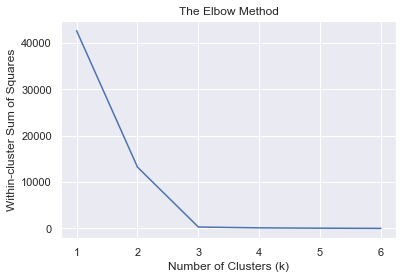

In [18]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,7)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of Clusters (k)')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')
plt.show()